In [1]:
import ffn
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#getting a list of S&P100 stocks from wikidpedia
table=pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')
df=table[2]
df.to_csv("S&P100-Info.csv")

In [3]:
#creating a list of stocks from the symbol column in df
stocks = df['Symbol']#.apply(lambda x: str(x))
stocks

0      AAPL
1      ABBV
2       ABT
3       ACN
4      ADBE
       ... 
96       VZ
97      WBA
98      WFC
99      WMT
100     XOM
Name: Symbol, Length: 101, dtype: object

In [4]:
#extract the tickers from stocks and append them to a list sp100
sp100 = []
for item in stocks:
    sp100.append(item)

In [5]:
#I know that Berkshire shares do not pull through yahoo finance so I am removing BRK.B
sp100.remove('BRK.B')

In [6]:
#Iterate through the sp100 list to see if there are any tickers that have "issues"
for i in sp100:
    try:
        data = ffn.get(i, start = "2020-01-01")
    except:
        print('There is a problem with {}'.format(i))

In [7]:
#using the ffn library to pull data
data = ffn.get(sp100, start = '2020-01-01')

In [10]:
#take a look at the data pull
data.tail()

,aapl,abbv,abt,acn,adbe,aig,amgn,amt,amzn,avgo,...,unh,unp,ups,usb,v,vz,wba,wfc,wmt,xom
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-07,127.900002,105.209999,120.110001,282.570007,493.410004,47.080002,248.119995,243.447723,3279.389893,482.459991,...,365.640015,221.339996,171.949997,56.810001,219.270004,58.371998,55.580002,39.990002,139.800003,56.590000
2021-04-08,130.360001,106.099998,119.779999,284.420013,499.839996,46.060001,246.880005,239.866287,3299.300049,485.480011,...,364.890015,220.179993,173.020004,56.779999,220.699997,57.599998,54.790001,40.029999,139.710007,56.000000
2021-04-09,133.000000,107.540001,120.900002,287.709991,504.040009,46.599998,248.949997,239.149994,3372.199951,485.089996,...,376.299988,223.240005,175.940002,57.290001,222.520004,57.490002,54.180000,40.500000,139.779999,55.869999
2021-04-12,131.240005,108.250000,121.040001,287.540009,506.029999,47.160000,248.940002,241.500000,3379.389893,483.670013,...,376.279999,223.550003,178.580002,57.680000,221.470001,57.540001,54.700001,40.770000,139.800003,55.500000
2021-04-13,134.514999,108.144997,123.260002,284.929993,515.090027,46.955002,249.720001,243.119995,3417.399902,484.200012,...,376.029999,222.350006,179.679993,56.840000,221.199997,57.639999,54.590099,39.889999,139.485001,55.775002


In [11]:
#calculate the daily and annual returns of the initial data pull
returns_daily = data.to_log_returns().dropna()
returns_annual = returns_daily.mean()*250
#return the length of the daily and annual returns dataframes for verification
len(returns_daily), len(returns_annual)

(321, 100)

In [12]:
#sort by annual returns in decreasing from highest annual return to lowest.
sort = pd.DataFrame(returns_annual.sort_values(ascending=False))

In [13]:
#create a list of top 20 tickers by annual return
top_20=sort[0:20].index
print(top_20)

Index(['tsla', 'nvda', 'pypl', 'fdx', 'aapl', 'amzn', 'low', 'nflx', 'tmus',
       'tgt', 'goog', 'googl', 'msft', 'blk', 'ups', 'qcom', 'ms', 'gm',
       'avgo', 'cat'],
      dtype='object')


In [14]:
#create a new dataframe that has only the top 20 stocks
top_20_df = data[[column for column in top_20]]
top_20_df.head()

,tsla,nvda,pypl,fdx,aapl,amzn,low,nflx,tmus,tgt,goog,googl,msft,blk,ups,qcom,ms,gm,avgo,cat
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,86.052002,239.514771,110.750000,152.410065,74.333511,1898.010010,117.948776,329.809998,78.589996,123.132607,1367.369995,1368.680054,158.571075,493.361145,112.318962,86.065712,50.262314,36.929497,305.916046,145.354584
2020-01-03,88.601997,235.681122,108.760002,150.523346,73.610840,1874.969971,117.106697,325.899994,78.169998,121.853142,1360.660034,1361.520020,156.596588,488.117126,112.251648,84.445114,49.451004,35.882271,298.135071,143.336472
2020-01-06,90.307999,236.669479,110.169998,150.641251,74.197395,1902.880005,117.841057,335.829987,78.620003,120.700638,1394.209961,1397.810059,157.001373,488.533966,111.751549,83.950211,49.277153,35.408058,297.689056,143.239868
2020-01-07,93.811996,239.534729,109.669998,152.115234,73.848442,1906.859985,117.136078,330.750000,78.919998,120.915504,1393.339966,1395.109985,155.569855,491.655121,111.559204,86.337425,49.180565,34.726376,296.664276,141.347275
2020-01-08,98.428001,239.984009,111.820000,154.404846,75.036385,1891.969971,118.996468,339.260010,79.419998,120.524826,1404.319946,1405.040039,158.047836,491.538788,112.193939,86.085114,49.808365,34.232399,292.963501,142.602585


In [16]:
top_20_df.to_csv("SP100 top 20 Returns Starting Jan 2020.csv")

In [32]:
#calculate the returns per the top_20 df
top_20_ret_daily = top_20_df.to_log_returns().dropna()
top_20_ret_ann = top_20_ret_daily.mean()*250

In [58]:
#view the annualized returns of the top 20 S&P100 stocks
top_20_ret_ann

tsla     1.653381
nvda     0.673630
pypl     0.649410
fdx      0.487148
amzn     0.421161
aapl     0.418195
tmus     0.407938
tgt      0.405916
gm       0.398824
low      0.393821
nflx     0.392296
qcom     0.388005
goog     0.386599
googl    0.383486
cat      0.376909
avgo     0.371419
blk      0.367614
txn      0.360058
msft     0.358358
ms       0.348772
dtype: float64

<module 'matplotlib.pyplot' from 'C:\\Users\\Elimanjuel\\Anaconda3\\envs\\Jupyter-Notebooks\\lib\\site-packages\\matplotlib\\pyplot.py'>

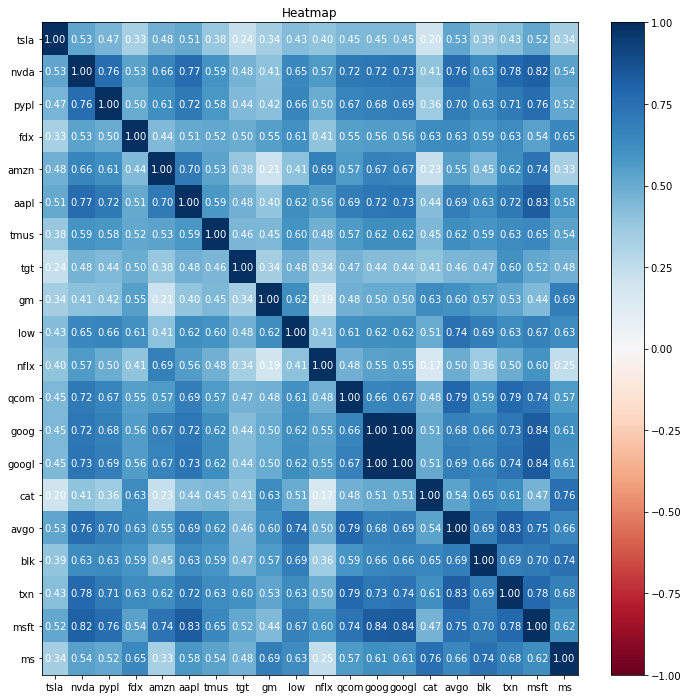

In [35]:
top_20_ret_daily.plot_corr_heatmap(figsize=(12,12))

### You can see that there is a lot of correlation with this basket of stocks

In [59]:
#calculate the daily and annual covariances
top_20_cov_daily = top_20_ret_daily.cov()
top_20_cov_annual = top_20_cov_daily*250 #250 trading days in a year.

In [38]:
# create empty lists to store returns, volatility, and weights of possible portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [39]:
####################################################
# set the number of portfolio combinations with    #
# the number of assets and portfolios as variables #
####################################################
num_assets = len(top_20)
num_portfolios = 50000

In [40]:
#set random seed
np.random.seed(42)

In [44]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, top_20_ret_ann)
    volatility = np.sqrt(np.dot(weights.T, np.dot(top_20_cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [45]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(top_20):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [49]:
#create the final dataframe with X number of portfolios randomized with different weights
sp_top_20 = pd.DataFrame(portfolio)

In [50]:
sp_top_20.tail()

,Returns,Volatility,Sharpe Ratio,tsla Weight,nvda Weight,pypl Weight,fdx Weight,amzn Weight,aapl Weight,tmus Weight,...,nflx Weight,qcom Weight,goog Weight,googl Weight,cat Weight,avgo Weight,blk Weight,txn Weight,msft Weight,ms Weight
49995,0.465837,0.354402,1.314431,0.023849,0.058872,0.081873,0.079439,0.079293,0.067218,0.075667,...,0.076629,0.065312,0.018480,0.042486,0.041421,0.003595,0.028007,0.012545,0.054985,0.078710
49996,0.533582,0.384227,1.388716,0.095151,0.073217,0.028417,0.006514,0.029906,0.023266,0.031544,...,0.075296,0.069661,0.011623,0.021517,0.072756,0.079451,0.072211,0.023935,0.092120,0.021879
49997,0.462258,0.352419,1.311669,0.049655,0.014750,0.021546,0.042595,0.082838,0.059896,0.011420,...,0.076482,0.061944,0.059794,0.080511,0.047268,0.018222,0.057035,0.061589,0.056095,0.083305
49998,0.503850,0.359707,1.400721,0.069783,0.016156,0.096803,0.009263,0.014174,0.011871,0.040727,...,0.068615,0.063045,0.044374,0.076197,0.022585,0.050187,0.087900,0.091283,0.011713,0.043215
49999,0.461824,0.371887,1.241839,0.038867,0.013287,0.091154,0.008406,0.012599,0.056446,0.023744,...,0.049085,0.092628,0.001688,0.023135,0.059503,0.088291,0.043477,0.041564,0.042618,0.092404


In [53]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio']+ [stock+' Weight' for stock in top_20]

In [54]:
# reorder dataframe columns
final = sp_top_20[column_order]

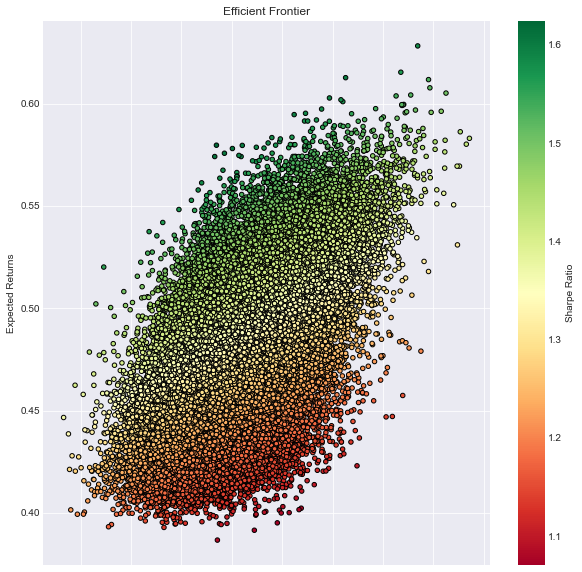

In [55]:
%matplotlib inline
plt.style.use('seaborn-dark')
final.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Text(0.5, 1.0, 'Efficient Frontier')

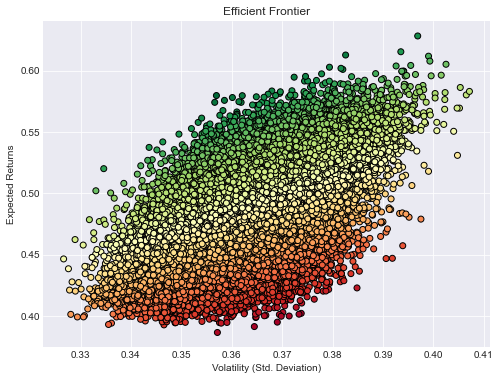

In [57]:
#plot using fig, ax
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final["Volatility"],final['Returns'],
           c = final['Sharpe Ratio'],
          cmap='RdYlGn',
          edgecolors = 'black',
          )
ax.grid(True)
ax.set_xlabel('Volatility (Std. Deviation)')
ax.set_ylabel('Expected Returns')
ax.set_title('Efficient Frontier')

In [1]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = final['Volatility'].min()
max_sharpe = final['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = final.loc[spdf['Sharpe Ratio'] == max_sharpe]
min_variance_port = final.loc[spdf['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
final.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=100)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=100 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

NameError: name 'final' is not defined

In [118]:
min_variance_port.T.as_format(".2%").to_csv("min_var_top_20_sp100_2020_to_recent.csv")

In [117]:
sharpe_portfolio.T.as_format(".2%").to_csv("max_sharp_top_20_sp100_2020_to_recent.csv")